# Solution to homework 3. Spring 2026 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Soilved as soil

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [41]:
#Read GSD data
GSD_A=pd.read_csv('./data/A.csv')
GSD_B=pd.read_csv('./data/B.csv')
GSD_C=pd.read_csv('./data/C.csv')

#Combine all GSDs into single DataFrame
GSDs=[ GSD_A, GSD_B, GSD_C ]

GSDs[0].head()

,d,Passing
0,10.564638,100.000000
1,8.150717,99.957184
2,6.288135,99.957184
3,4.851183,99.945536
4,3.742473,99.422613


In [42]:
from frake import GraphFunctions as gf
import seaborn as sns

c:\ProgramData\Anaconda3\lib\site-packages\frake\GraphFunctions.py:73: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  plt.rcParams['text.latex.preamble'] = [r'\usepackage{bm}']


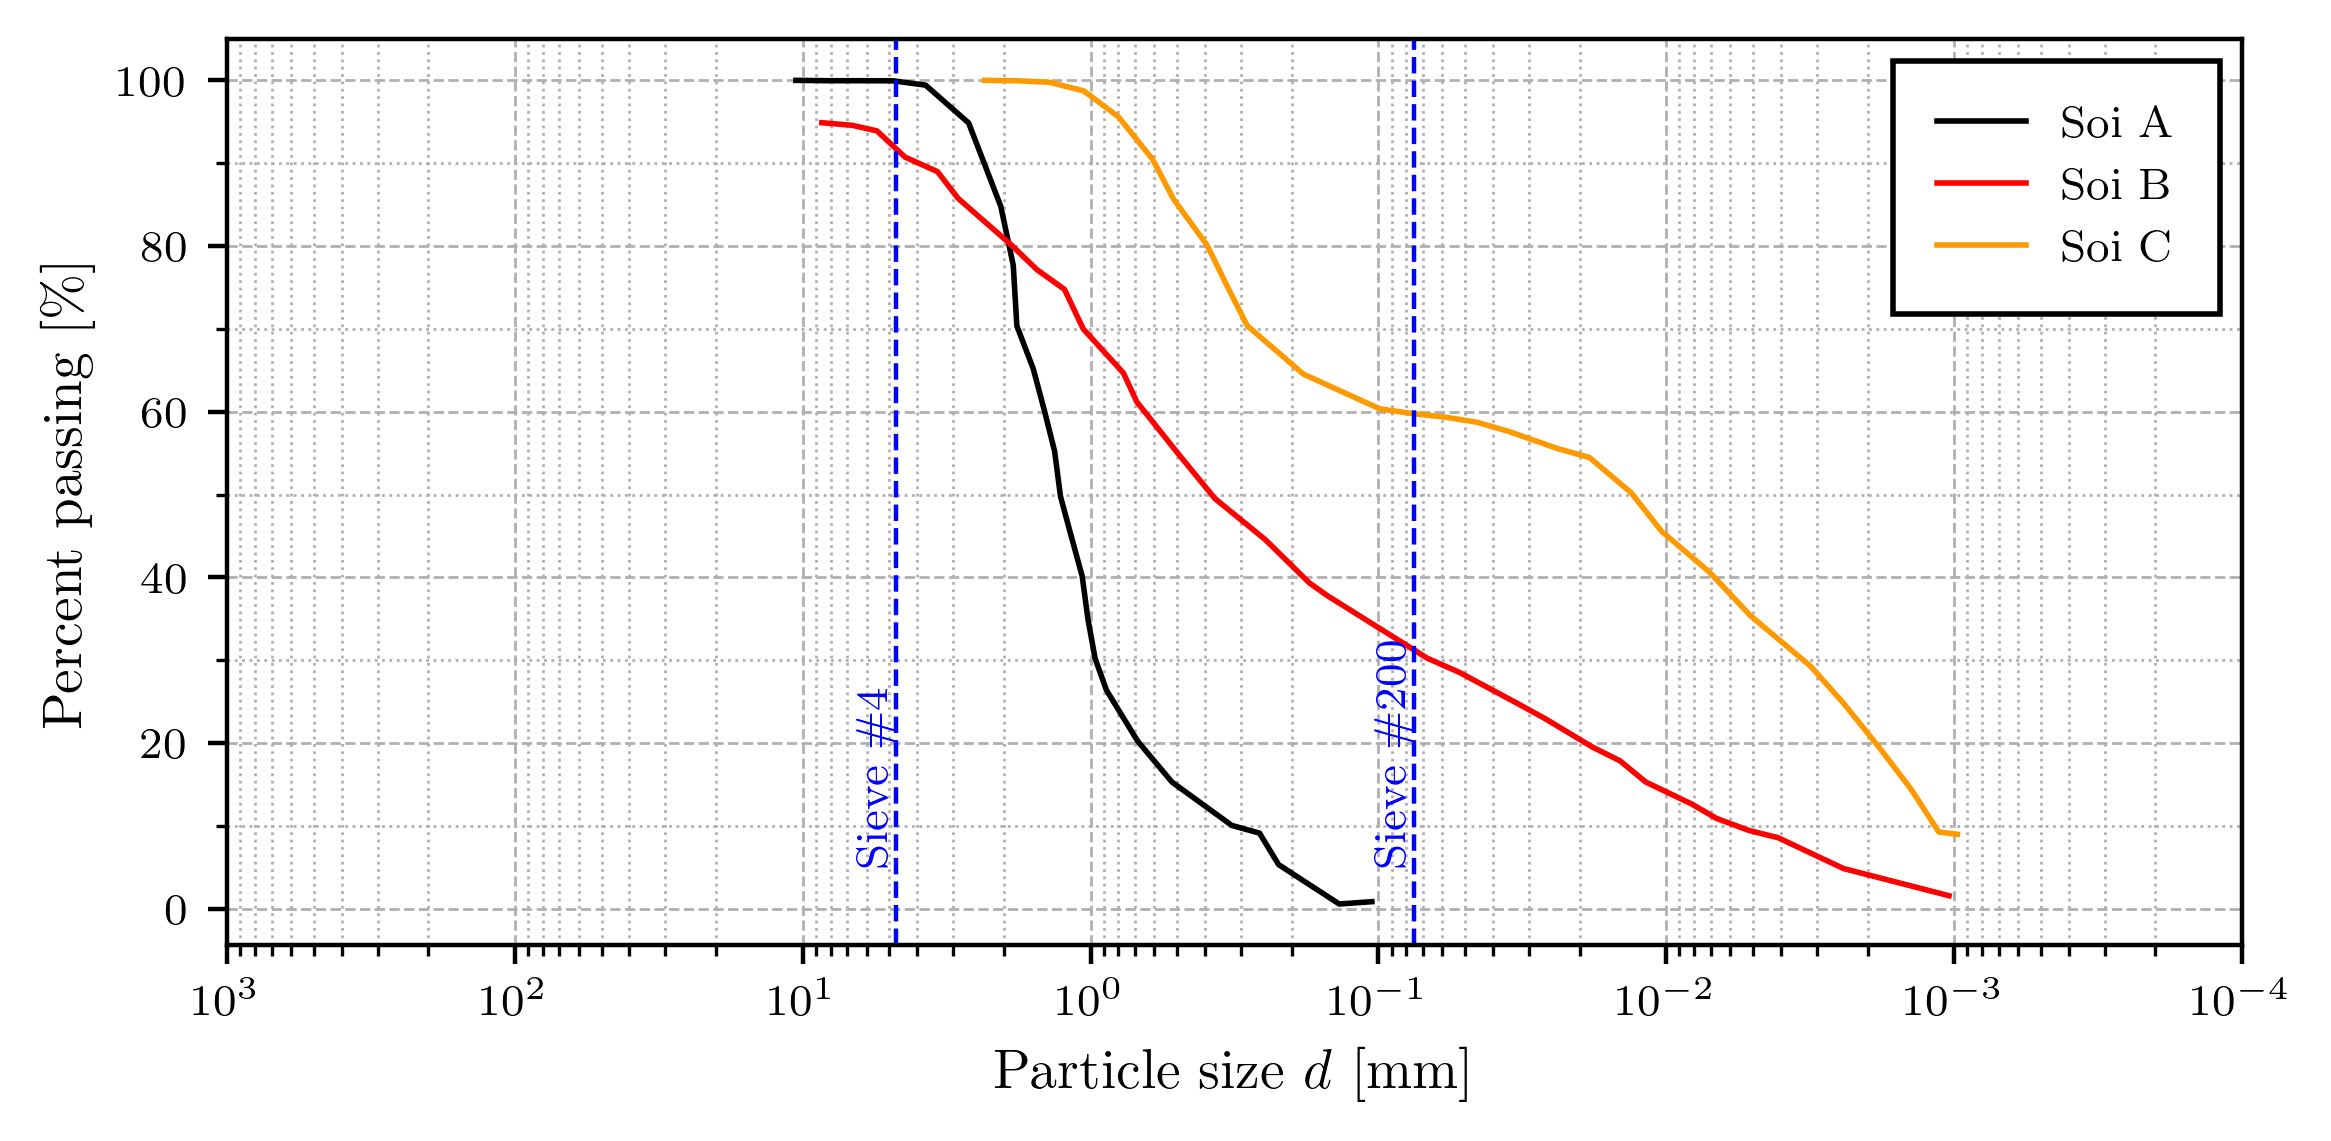

In [43]:
#plot data
label=[r'Soi A', r'Soi B', r'Soi C']

#define a color scheme with 3 colors in black, red, and yellow
my_colors = sns.color_palette(["#000000", "#FF0000", "#FF9900FF"])

#Define figure size
width= 6.5 #inches
height= 3 #inches

gf.PlotAll(GSDs, label, 'd', 'Passing', xlabel=r'Particle size $d$ [mm]', ylabel=r'Percent passing [\%]', hold=1, palete=my_colors, xsize=width, ysize=height, mode='.-')

#Make x axis logarithmic
plt.xscale('log')

#invert x axis
plt.gca().invert_xaxis()

#Add sive #4 and #200 lines
plt.axvline(x=4.75, color='blue', linestyle='--', linewidth=0.8)
plt.axvline(x=0.075, color='blue', linestyle='--', linewidth=0.8)

#Add labels for sieve sizes
plt.text(4.75, 5, r'Sieve \#4', rotation=90, color='blue', verticalalignment='bottom', horizontalalignment='right')
plt.text(0.075, 5, r'Sieve \#200', rotation=90, color='blue', verticalalignment='bottom', horizontalalignment='right')

#make the x axis go from 10^3 to 10^-4
plt.xlim(10**3, 10**-4)

#Add minor grids in x and y direction (in y every 10%)
plt.grid(which='minor', axis='both', linestyle=':', linewidth=0.5)
plt.minorticks_on()
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.gca().xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=10))

#Add major grids
plt.grid(which='major', axis='both', linestyle='--', linewidth=0.5)

In [46]:
def Get_soil_fractions(GSD):
    """
    Calculate soil fractions: gravel, sand, silt, clay from GSD data.
    GSD: DataFrame with columns 'd' and 'Passing'
    Returns: dictionary with fractions in percent
    """
    d = GSD['d'].values
    passing = GSD['Passing'].values

    # Interpolate to find percent passing at specific sizes
    def interp_percent(size):
        return np.interp(size, d[::-1], passing[::-1])

    percent_passing_4_75 = interp_percent(4.75)
    percent_passing_0_075 = interp_percent(0.075)
    percent_passing_0_002 = interp_percent(0.002)

    gravel = 100 - percent_passing_4_75
    sand = percent_passing_4_75 - percent_passing_0_075
    Fines= percent_passing_0_075

    return {
        'gravel': gravel,
        'sand': sand,
        'fines': Fines
    }

In [49]:
#Solution to homework

#a: Determine soil fractions.

print("Soil A fractions:")
print(Get_soil_fractions(GSD_A))

print("Soil B fractions:")
print(Get_soil_fractions(GSD_B))

print("Soil C fractions:")
print(Get_soil_fractions(GSD_C))


Soil A fractions:
{'gravel': 0.10218707901229607, 'sand': 99.04185483036963, 'fines': 0.8559580906180742}
Soil B fractions:
{'gravel': 8.301228897619666, 'sand': 60.78775645724139, 'fines': 30.91101464513894}
Soil C fractions:
{'gravel': 0.0, 'sand': 40.25800099443895, 'fines': 59.74199900556105}


In [50]:
#Function to get particle size corresponding to x percent passing
def get_particle_size(GSD, percent):
    """
    Get particle size corresponding to given percent passing.
    GSD: DataFrame with columns 'd' and 'Passing'
    percent: percent passing value
    Returns: particle size d
    """
    d = GSD['d'].values
    passing = GSD['Passing'].values

    # Log-linear interpolation: interpolate log10(d) vs Passing (linear), then convert back
    log_d = np.log10(d[::-1])
    passing_rev = passing[::-1]
    size = 10 ** np.interp(percent, passing_rev, log_d)

    return size

In [51]:
#c Determine D10, D30, D60 for each soil.

print("Soil A D10, D30, D60:")
D10_A = get_particle_size(GSD_A, 10)
D30_A = get_particle_size(GSD_A, 30)
D60_A = get_particle_size(GSD_A, 60)
print(f"D10: {D10_A:.4f} mm, D30: {D30_A:.4f} mm, D60: {D60_A:.4f} mm")

print("Soil B D10, D30, D60:")
D10_B = get_particle_size(GSD_B, 10)
D30_B = get_particle_size(GSD_B, 30)
D60_B = get_particle_size(GSD_B, 60)
print(f"D10: {D10_B:.4f} mm, D30: {D30_B:.4f} mm, D60: {D60_B:.4f} mm")

print("Soil C D10, D30, D60:")
D10_C = get_particle_size(GSD_C, 10)
D30_C = get_particle_size(GSD_C, 30)
D60_C = get_particle_size(GSD_C, 60)
print(f"D10: {D10_C:.4f} mm, D30: {D30_C:.4f} mm, D60: {D60_C:.4f} mm")

Soil A D10, D30, D60:
D10: 0.3185 mm, D30: 0.9598 mm, D60: 1.4438 mm
Soil B D10, D30, D60:
D10: 0.0057 mm, D30: 0.0652 mm, D60: 0.6489 mm
Soil C D10, D30, D60:
D10: 0.0012 mm, D30: 0.0033 mm, D60: 0.0844 mm


In [52]:
#Determine Cu and Cc for each soil.
Cu_A = D60_A / D10_A
Cc_A = (D30_A ** 2) / (D10_A * D60_A)
print(f"Soil A: Cu = {Cu_A:.2f}, Cc = {Cc_A:.2f}")

Cu_B = D60_B / D10_B
Cc_B = (D30_B ** 2) / (D10_B * D60_B)
print(f"Soil B: Cu = {Cu_B:.2f}, Cc = {Cc_B:.2f}")

Cu_C = D60_C / D10_C
Cc_C = (D30_C ** 2) / (D10_C * D60_C)
print(f"Soil C: Cu = {Cu_C:.2f}, Cc = {Cc_C:.2f}")

Soil A: Cu = 4.53, Cc = 2.00
Soil B: Cu = 113.97, Cc = 1.15
Soil C: Cu = 72.34, Cc = 0.11


Soil A: Uniform sand

Soil B: Well graded sand

Soil C: Gap graded fines plus sand

In [57]:
# QUESTION 2

#Read GSD raw data
GSD_problem2=pd.read_csv('./data/data_sieve_analysis_problem_2_homework3.csv')

#Calculate cummulative percent passing
GSD_problem2['Cumulative_W'] = GSD_problem2['W'].cumsum()
total_W = GSD_problem2['W'].sum()
GSD_problem2['Retained'] = (GSD_problem2['Cumulative_W'] / total_W) * 100

#Calculate percent passing
GSD_problem2['Passing'] = 100 - GSD_problem2['Retained']

#get a new dataset deleting last point which represents the pan
GSD_problem2_cleaned = GSD_problem2.iloc[:-1].copy()

c:\ProgramData\Anaconda3\lib\site-packages\frake\GraphFunctions.py:73: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  plt.rcParams['text.latex.preamble'] = [r'\usepackage{bm}']


AttributeError: module 'frake.GraphFunctions' has no attribute 'FormatLogAxis'

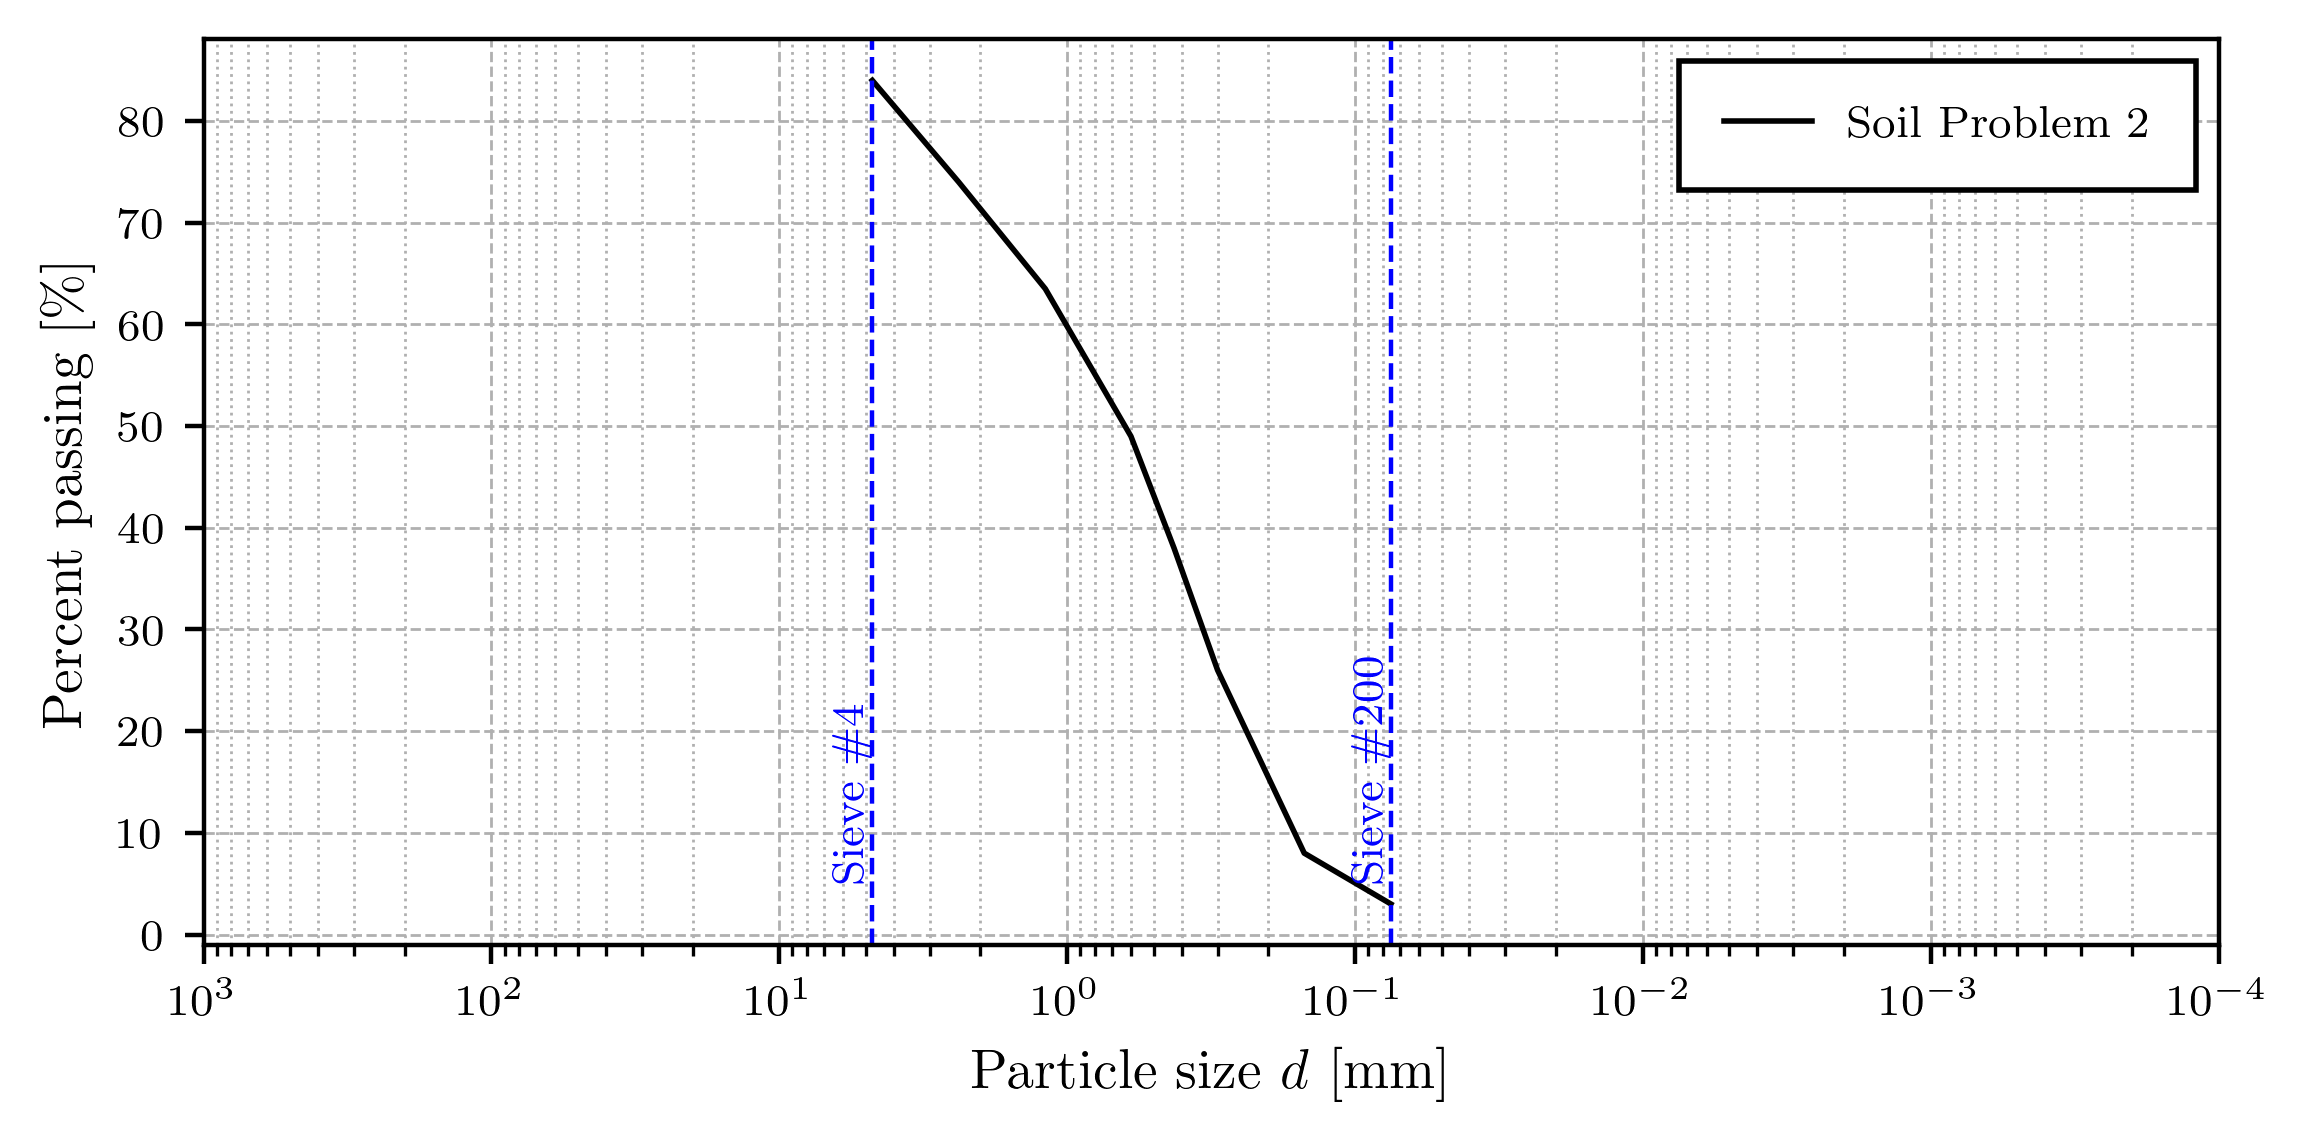

In [58]:
#plot GSD data
label=[r'Soil Problem 2']

#define a color scheme with 3 colors in black, red, and yellow
my_colors = sns.color_palette(["#000000", "#FF0000", "#FF9900FF"])
#my_colors = sns.color_palette(["#000000", "#FF0000", "#FFFF00"])
gf.PlotAll([GSD_problem2_cleaned], label, 'd', 'Passing', xlabel=r'Particle size $d$ [mm]', ylabel=r'Percent passing [\%]', hold=1, palete=my_colors, xsize=width, ysize=height, mode='.-')
#Make x axis logarithmic
plt.xscale('log')
#invert x axis
plt.gca().invert_xaxis()
#Add sive #4 and #200 lines
plt.axvline(x=4.75, color='blue', linestyle='--', linewidth=0.8)
plt.axvline(x=0.075, color='blue', linestyle='--', linewidth=0.8)
#Add labels for sieve sizes 
plt.text(4.75, 5, r'Sieve \#4', rotation=90, color='blue', verticalalignment='bottom', horizontalalignment='right')
plt.text(0.075, 5, r'Sieve \#200', rotation=90, color='blue', verticalalignment='bottom', horizontalalignment='right')
#make the x axis go from 10^3 to 10^-4
plt.xlim(10**3, 10**-4)
#Add minor grids in x and y direction (in y every 10%)
plt.grid(which='minor', axis='both', linestyle=':', linewidth=0.5)
plt.minorticks_on()
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.gca().xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=10))
#Add major grids
plt.grid(which='major', axis='both', linestyle='--', linewidth=0.5)
#Make x axis labels have three significant digits in decimal format 
gf.FormatLogAxis(plt.gca().xaxis, sig_digits=3, decimal=True)


In [59]:
#Soil fractions
print("Soil Problem 2 fractions:")
print(Get_soil_fractions(GSD_problem2_cleaned))

Soil Problem 2 fractions:
{'gravel': 16.0, 'sand': 81.0, 'fines': 3.0}


In [60]:
#Determine D10, D30, D60 for the soil.
print("Soil Problem 2 D10, D30, D60:")
D10_problem2 = get_particle_size(GSD_problem2_cleaned, 10)
D30_problem2 = get_particle_size(GSD_problem2_cleaned, 30)
D60_problem2 = get_particle_size(GSD_problem2_cleaned, 60)
print(f"D10: {D10_problem2:.4f} mm, D30: {D30_problem2:.4f} mm, D60: {D60_problem2:.4f} mm")

Soil Problem 2 D10, D30, D60:
D10: 0.1620 mm, D30: 0.3369 mm, D60: 1.0087 mm


In [61]:
#Calculate Cu and Cc for the soil.
Cu_problem2 = D60_problem2 / D10_problem2
Cc_problem2 = (D30_problem2 ** 2) / (D10_problem2 * D60_problem2)
print(f"Soil Problem 2: Cu = {Cu_problem2:.2f}, Cc = {Cc_problem2:.2f}")

Soil Problem 2: Cu = 6.23, Cc = 0.69


Soil is a sand so S.

Soil is poorly graded because $C_c <1$ so SP

$G_F > 15\%$ $\implies$ SP Poorly graded sand with gravel

In [64]:
#QUESTION 3

#Determine gravel fractions

#Since D_30 is equal to 4.75 mm, we can use it to determine the gravel fraction.
G_F= 100-30
print(f"Gravel fraction: {G_F}%")

Gravel fraction: 70%


Thus we know soil is G

By $C_c$ and $C_u$, second descriptor is well graded so GW.

And since sand fraction must be larger than 25%, tertiary descriptor is "with sand" $\implies$ GW Well graded gravel with sand

For part b)

Ff=60%. So use plasticity chart $\implies$ CH

Soil still has 40% between gravel and sand. Here there is no way to assign specific name, since amount of gravel and sand is unknown.

Liquid Limit (LL) at N=25: 44.89%


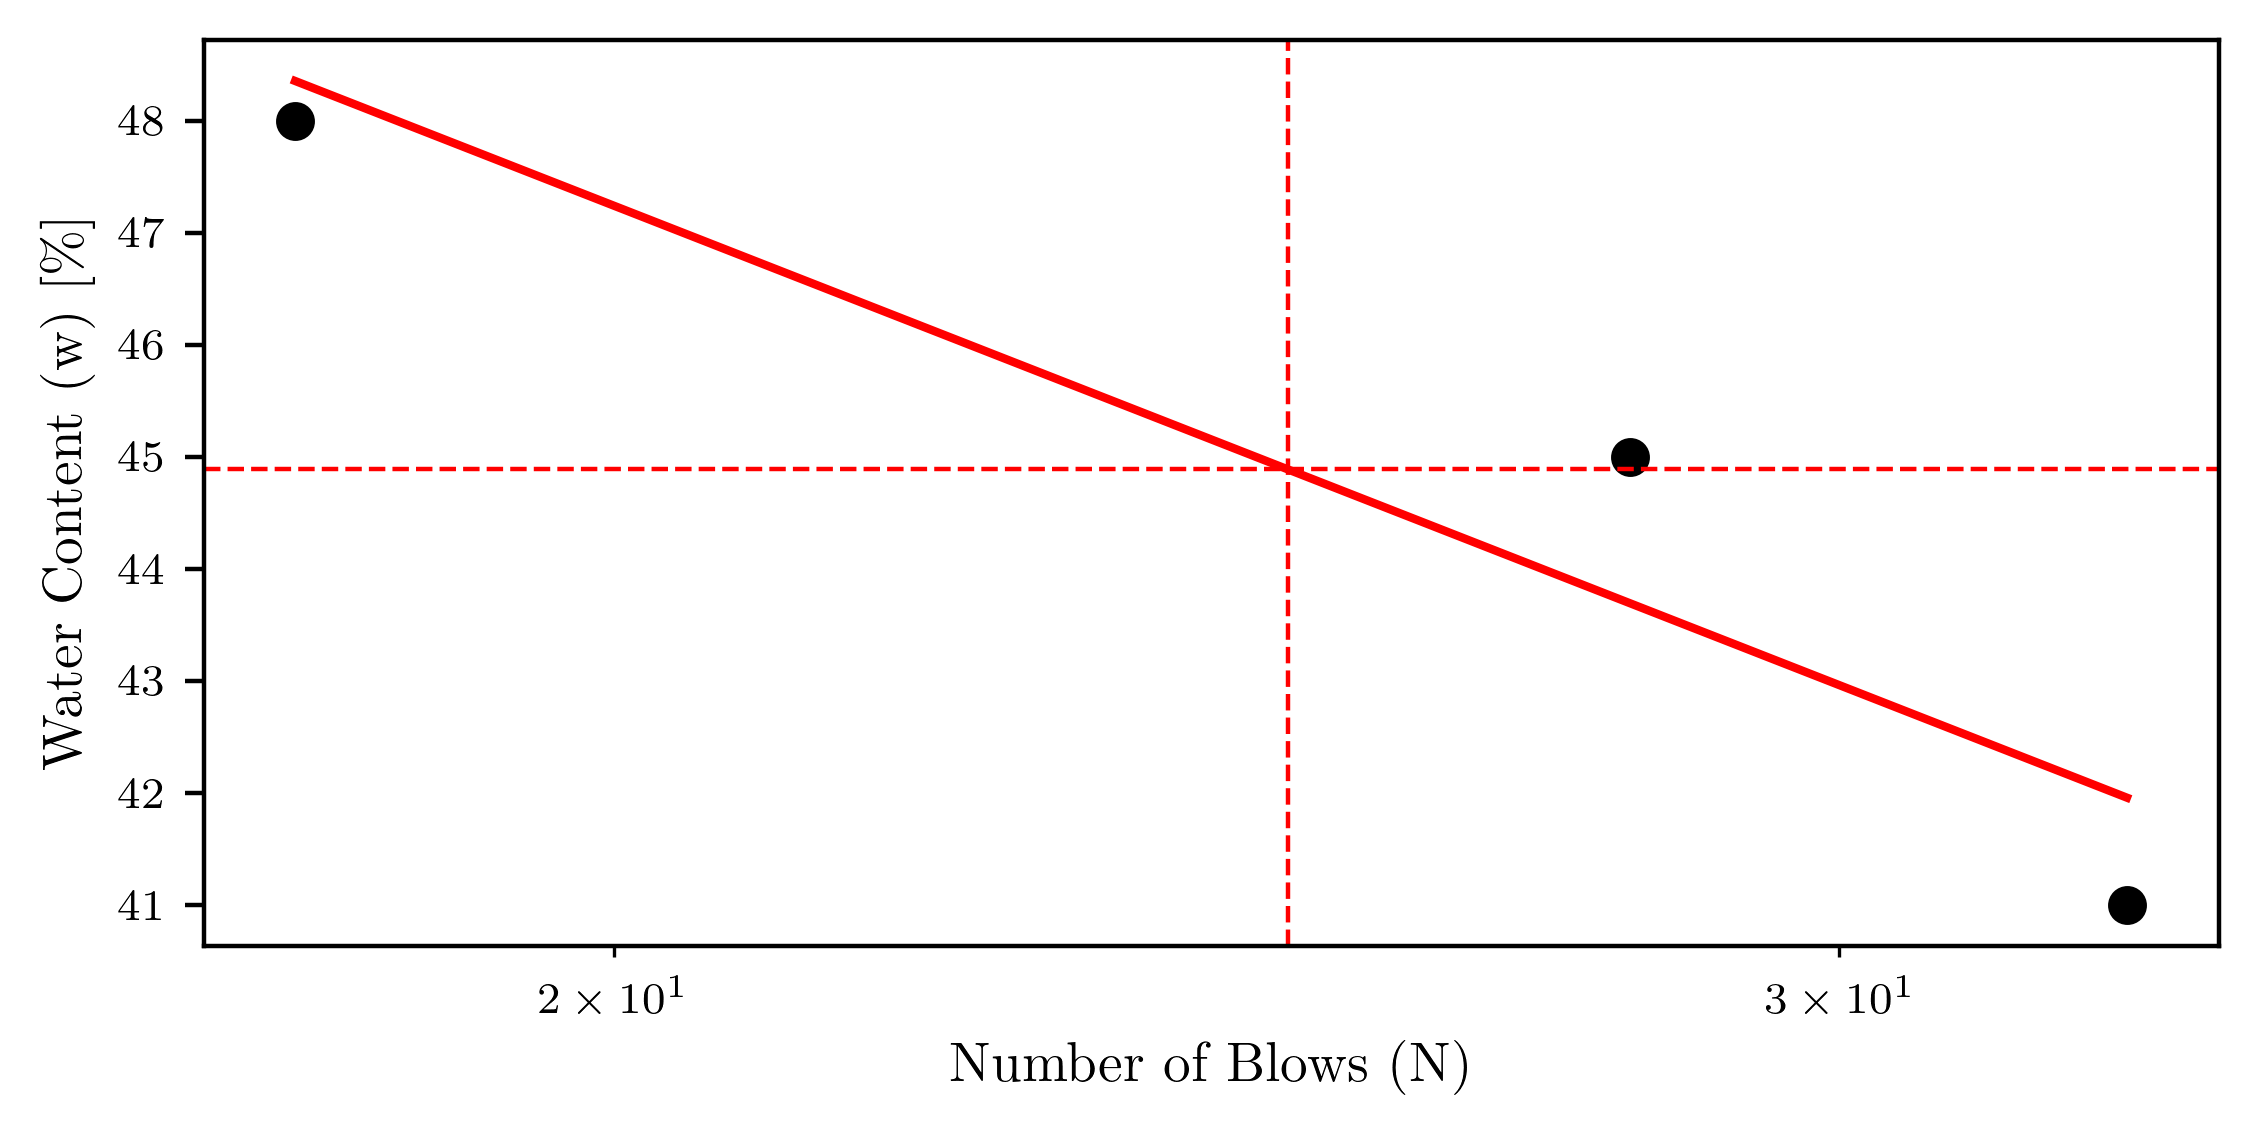

In [70]:
#QUESTION 4

N=[18, 28, 33] #number of blows
w=[48, 45, 41] #water content in percent

#Plot flow curve in semilogiarithmic scale

plt.semilogx(N, w, marker='o', linestyle='')
plt.xlabel(r'Number of Blows (N)')
plt.ylabel(r'Water Content (w) [\%]')

#fit a log-linear curve to the data
coefficients = np.polyfit(np.log10(N), w, 1)
poly = np.poly1d(coefficients)
N_fit = np.logspace(np.log10(min(N)), np.log10(max(N)), 100)
w_fit = poly(np.log10(N_fit))
plt.semilogx(N_fit, w_fit, linestyle='-')

#Find LL at N=25
LL = poly(np.log10(25))
print(f"Liquid Limit (LL) at N=25: {LL:.2f}%")

#Draw line
plt.axvline(x=25, color='red', linestyle='--', linewidth=0.8)
plt.axhline(y=LL, color='red', linestyle='--', linewidth=0.8)


Soil classification:

FF=77 $\implies$ fines, use Plasticity chart $\implies$ CL



In [71]:
45-18

27